<a href="https://colab.research.google.com/github/Tapey-ui/Coursera_Capstone/blob/main/The_Battle_of_Neighborhoods_(Week_1)_Report_%2B_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Project - The Battle of the Neighborhoods

## 1. Introduction: Problem Description

As one of the developing countries in the Asia Pacific region, Malaysia is well known for its blooming travelling industry. In 2019, the capital state of Malaysia, which is Kuala Lumpur, ranked 10th in destination popularity worldwide for tourists, with an approximate amount of 14.07 million tourists arriving. In the same year, Malaysia also ranked 22nd in worldwide tourism popularity with a total of 26 million tourists visiting the country. 

The high popularity amongst tourists and backpackers eventually resulted in the rise of hotels and hostels in Kuala Lumpur. In 2019, there were a total amount of 4,826 of hotels in the capital state. With the increasing amount of hotels, it was expected there will be more people who are interested in starting a hotel. This project is mainly aimed to help owners to find the optimal location for business, which includes analysis such as:

- What is the best location to start a new hotel in Kuala Lumpur?
- Which area has more facilities around?



## 2. Data Requirements

- A list of KL districts, with their postcodes

***Source (Credits to zaephaer)***: [https://github.com/zaephaer/CapstoneProject/blob/master/KL_disrict.csv](https://github.com/zaephaer/CapstoneProject/blob/master/KL_disrict.csv)

- Foursquare API, to locate the longitude and latitude of the areas, as well as listing the name and category of each area

***Source:*** [https://foursquare.com/developers/apps](https://foursquare.com/developers/apps)

- Geocoder package, to track down the longitude and latitude of the areas

In [5]:
from google.colab import drive 
drive.mount('/content/gdrive')

import io
import pandas as pd

df = pd.read_csv('gdrive/MyDrive/Colab Notebooks/KL_disrict.csv')
df.head()


Mounted at /content/gdrive


,Postcode,District,Area
0,52100,Kepong,Jinjang
1,52100,Kepong,Taman Bukit Maluri
2,51200,Segambut,Bandar Menjalara
3,51200,Segambut,Bukit Kiara
4,51200,Segambut,Bukit Tunku


In [6]:
print('{} district, {} areas.'.format(
        len(df['District'].unique()),
        df.shape[0]
    )
)


df.groupby('District').count()

11 district, 66 areas.


,Postcode,Area
District,,
Bandar Tun Razak,6,6
Batu,2,2
Bukit Bintang,11,11
Cheras,9,9
Kepong,2,2
Lembah Pantai,6,6
Segambut,11,11
Seputeh,8,8
Setiawangsa,3,3


### 3. Report

##### a. Add Longitude and Latitude to Dataframe

In [7]:
import requests

url = 'http://api.positionstack.com/v1/forward'



def get_latlng(postal_code):
    lat_lng_coords = None
    while(lat_lng_coords is None):
        r = requests.get(url, 
                 params = {
                     'access_key' : '7b9687e78ef06403f2ab208c03c44c82',
                    'query' : '{}, Malaysia'.format(postal_code)
                 })
        d = r.json()
        print(d)
        lat = d['data'][0]['latitude']
        long = d['data'][0]['longitude']
        lat_lng_coords = [lat,long]
    return lat_lng_coords

postal_codes1 = df['Area']    
coords = [ get_latlng(postal_code) for postal_code in postal_codes1.tolist() ]

df_kl_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])
df['Latitude'] = df_kl_coords['Latitude']
df['Longitude'] = df_kl_coords['Longitude']
df.head(10)

{'data': [{'latitude': 3.21667, 'longitude': 101.65, 'type': 'neighbourhood', 'name': 'Jinjang', 'number': None, 'postal_code': None, 'street': None, 'confidence': 0.6, 'region': 'Kuala Lumpur', 'region_code': 'KUL', 'county': None, 'locality': 'Kuala Lumpur', 'administrative_area': None, 'neighbourhood': 'Jinjang', 'country': 'Malaysia', 'country_code': 'MYS', 'continent': 'Asia', 'label': 'Jinjang, Kuala Lumpur, Malaysia'}]}
{'data': [{'latitude': 3.194706, 'longitude': 101.628797, 'type': 'neighbourhood', 'name': 'Taman Bukit Maluri', 'number': None, 'postal_code': None, 'street': None, 'confidence': 1, 'region': 'Kuala Lumpur', 'region_code': 'KUL', 'county': None, 'locality': 'Kuala Lumpur', 'administrative_area': None, 'neighbourhood': 'Taman Bukit Maluri', 'country': 'Malaysia', 'country_code': 'MYS', 'continent': 'Asia', 'label': 'Taman Bukit Maluri, Kuala Lumpur, Malaysia'}]}
{'data': [{'latitude': 3.194054, 'longitude': 101.629478, 'type': 'venue', 'name': 'Bandar Menjalara',

,Postcode,District,Area,Latitude,Longitude
0,52100,Kepong,Jinjang,3.216670,101.650000
1,52100,Kepong,Taman Bukit Maluri,3.194706,101.628797
2,51200,Segambut,Bandar Menjalara,3.194054,101.629478
3,51200,Segambut,Bukit Kiara,5.336992,100.465335
4,51200,Segambut,Bukit Tunku,3.165364,101.683011
5,51200,Segambut,Damansara,3.130436,101.624480
6,51200,Segambut,Damansara Town Centre,53.171488,-6.533848
7,51200,Segambut,Jalan Duta,2.521947,113.833569
8,51200,Segambut,Kampung Kasipillay,3.150000,101.533330
9,51200,Segambut,Kampung Sungai Penchala,2.521947,113.833569


b. Correct inaccuracies and duplicate areas in dataframe (Below coordinates are searched and corrected)

In [8]:
df.loc[[3],['Latitude', 'Longitude']] = [3.1468, 101.6623]
df.loc[[6],['Latitude', 'Longitude']] = [3.104244, 101.695232]
df.loc[[7],['Latitude', 'Longitude']] = [3.170007, 101.653672]
df.loc[[9],['Latitude', 'Longitude']] = [3.162039, 101.624515]
df.loc[[13],['Latitude', 'Longitude']] = [3.182944, 101.697681]
df.loc[[16],['Latitude', 'Longitude']] = [3.241726, 101.726578]
df.loc[[17],['Latitude', 'Longitude']] = [3.2102, 101.7296]
df.loc[[18],['Latitude', 'Longitude']] = [3.1756, 101.7357]
df.loc[[19],['Latitude', 'Longitude']] = [3.18189, 101.743383]
df.loc[[20],['Latitude', 'Longitude']] = [3.1818, 101.7341]
df.loc[[21],['Latitude', 'Longitude']] = [3.1491, 101.7625]
df.loc[[22],['Latitude', 'Longitude']] = [3.133056, 101.723889]
df.loc[[23],['Latitude', 'Longitude']] = [3.134004,  101.734795]
df.loc[[24],['Latitude', 'Longitude']] = [3.1631, 101.7062]
df.loc[[25],['Latitude', 'Longitude']] = [3.1406, 101.7289]
df.loc[[26],['Latitude', 'Longitude']] = [3.134314, 101.686364]
df.loc[[30],['Latitude', 'Longitude']] = [3.1562, 101.7030]
df.loc[[31],['Area', 'Latitude', 'Longitude']] = ['Desa Petaling', 3.0835, 101.7105]
df.loc[[32],['Latitude', 'Longitude']] = [3.157764, 101.711861]
df.loc[[33],['Latitude', 'Longitude']] = [3.1593, 101.6989]
df.loc[[34],['Latitude', 'Longitude']] = [3.133767, 101.713841]
df.loc[[38],['Latitude', 'Longitude']] = [3.1106, 101.6663]
df.loc[[39],['Latitude', 'Longitude']] = [3.1378, 101.6794]
df.loc[[40],['Latitude', 'Longitude']] = [3.11844, 101.674086]
df.loc[[41],['Latitude', 'Longitude']] = [3.118056, 101.676666]
df.loc[[43],['Latitude', 'Longitude']] = [3.130850, 101.700807]
df.loc[[46],['Latitude', 'Longitude']] = [3.0847, 101.6846]
df.loc[[47],['Latitude', 'Longitude']] = [3.0839, 101.6883]
df.loc[[49],['Latitude', 'Longitude']] = [3.104334, 101.68909]
df.loc[[50],['Latitude', 'Longitude']] = [3.0726, 101.6731]
df.loc[[51],['Latitude', 'Longitude']] = [3.0601, 101.7407]
df.loc[[52],['Latitude', 'Longitude']] = [3.128502, 101.729831]
df.loc[[53],['Latitude', 'Longitude']] = [3.133767, 101.713841]
df.loc[[55],['Latitude', 'Longitude']] = [3.0821, 101.7462]
df.loc[[56],['Latitude', 'Longitude']] = [3.0816, 101.7361]
df.loc[[57],['Latitude', 'Longitude']] = [3.09338, 101.727584]
df.loc[[58],['Latitude', 'Longitude']] = [3.0738, 101.7439]
df.loc[[61],['Latitude', 'Longitude']] = [3.076274, 101.711087]
df.loc[[63],['Latitude', 'Longitude']] = [3.0743, 101.7089]
df.loc[[64],['Latitude', 'Longitude']] = [3.0627, 101.7113]

new_df = df.drop([45, 52, 53, 62], axis = 0)

##### b. Create Map with Pointers

In [9]:
from geopy.geocoders import Nominatim
import folium

address = 'Kuala Lumpur, Malaysia'
geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

map = folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, long, dis, ngh in zip(new_df['Latitude'], new_df['Longitude'], new_df['District'], new_df['Area']):
  label = '{}, {}'.format(ngh, dis)
  label = folium.Popup(label, parse_html=True)
  folium.CircleMarker(
        [lat, long],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map) 
     
    
map


/usr/local/lib/python3.7/dist-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


## 3. Methodology

To gain useful information of the facilities surrounding the areas listed, the Foursquare API is used to gain information on nearby venues in theses areas.

Since Bukit Bintang and Segambut has the two highest amount of areas amongst the districts, both are chosen for this comparison.

In [10]:
CLIENT_ID = 'N4MTF3FYPCLOXW4SF2V1FOVLUHGZIAJJH0C0BJ31RHPYM13X'
CLIENT_SECRET = 'QFZGB50JLXIUBBG1DAYHIRH5ODYYA4BJZZEPNULA0UARUBUZ'
VERSION = '20210723'

In [11]:
LIMIT = 100
RADIUS = 500

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Area', 
                  'Area Latitude', 
                  'Area Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#run the above function on each neighborhood and create a new dataframe
df_venues = getNearbyVenues(names=new_df['Area'],
                                   latitudes=new_df['Latitude'],
                                   longitudes=new_df['Longitude']
                                  )

#check the size of the resulting dataframe
print(df_venues.shape)
df_venues.head()

Jinjang
Taman Bukit Maluri
Bandar Menjalara
Bukit Kiara
Bukit Tunku
Damansara
Damansara Town Centre
Jalan Duta
Kampung Kasipillay
Kampung Sungai Penchala
Mont Kiara
Sri Hartamas
Taman Tun Dr Ismail
Bandar Baru Sentul
Sentul
Setapak
Taman Melati
Taman P. Ramlee
Kampung Datuk Keramat
Semarak
Desa Tun Hussein Onn
Ampang
Jalan Cochrane
Maluri
Kampung Baru
Kampung Pandan
KL Sentral
Bukit Nanas
Bukit Petaling
Chow Kit
Dang Wangi
Desa Petaling
KL City Centre
Medan Tuanku
Pudu
Salak South
Tun Razak Exchange
Bangsar
Bangsar South
Federal Hill
Kg Abdullah Hukum
Mid Valley City
Pantai Dalam
Bandar Malaysia
Bukit Jalil
Happy Garden
Kuchai Lama
Sri Petaling
Taman Desa
Taman OUG
Alam Damai
Shamelin Perkasa
Taman Cheras Hartamas
Taman Connaught
Taman Midah
Taman Len Seng
Taman Taynton View
Bandar Sri Permaisuri
Bandar Tasik Selatan
Kampung Malaysia
Lake Fields
Sungai Besi
(2001, 7)


,Area,Area Latitude,Area Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Jinjang,3.21667,101.65,棗子樹素食館,3.215521,101.652653,Vegetarian / Vegan Restaurant
1,Jinjang,3.21667,101.65,枣子树素食馆,3.215603,101.652550,Vegetarian / Vegan Restaurant
2,Jinjang,3.21667,101.65,Ei8hty Se7en Street Dance Academy,3.212944,101.647821,Dance Studio
3,Jinjang,3.21667,101.65,Ayam Golek Baling,3.213437,101.647181,Food Service
4,Jinjang,3.21667,101.65,Restoran De Hunan 湖南湘菜馆,3.212993,101.647573,Chinese Restaurant


In [12]:
print('There are {} uniques categories in Kuala Lumpur.'.format(len(df_venues['Venue Category'].unique())))
df_venues.groupby('Area').count().head(20)

There are 262 uniques categories in Kuala Lumpur.


,Area Latitude,Area Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Area,,,,,,
Alam Damai,18,18,18,18,18,18
Ampang,46,46,46,46,46,46
Bandar Baru Sentul,17,17,17,17,17,17
Bandar Malaysia,8,8,8,8,8,8
Bandar Menjalara,46,46,46,46,46,46
Bandar Sri Permaisuri,38,38,38,38,38,38
Bandar Tasik Selatan,14,14,14,14,14,14
Bangsar,95,95,95,95,95,95
Bangsar South,39,39,39,39,39,39


In [13]:
# one hot encoding
df_onehot = pd.get_dummies(df_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
df_onehot['Area'] = df_venues['Area'] 

# move neighborhood column to the first column
fixed_columns = [df_onehot.columns[-1]] + list(df_onehot.columns[:-1])
df_onehot = df_onehot[fixed_columns]

#examine the new dataframe size after one hot encoding
print('{} rows were returned after one hot encoding.'.format(df_onehot.shape[0]))

#group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
df_grouped = df_onehot.groupby('Area').mean().reset_index()

#examine the new dataframe size after one hot encoding
print('{} rows were returned after grouping.'.format(df_grouped.shape[0]))

2001 rows were returned after one hot encoding.
62 rows were returned after grouping.


In [14]:
num_top_venues = 5

for area in df_grouped['Area']:
    print("----"+area+"----")
    temp = df_grouped[df_grouped['Area'] == area].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Alam Damai----
               venue  freq
0  Convenience Store  0.17
1   Malay Restaurant  0.11
2     Breakfast Spot  0.06
3          Pet Store  0.06
4      Grocery Store  0.06


----Ampang----
                venue  freq
0  Chinese Restaurant  0.13
1    Asian Restaurant  0.11
2    Malay Restaurant  0.07
3   Indian Restaurant  0.07
4          Food Truck  0.04


----Bandar Baru Sentul----
                  venue  freq
0            Laundromat  0.06
1            Food Truck  0.06
2                   Gym  0.06
3               Stadium  0.06
4  Fast Food Restaurant  0.06


----Bandar Malaysia----
                venue  freq
0    Malay Restaurant  0.25
1            Building  0.12
2  Falafel Restaurant  0.12
3           Gift Shop  0.12
4      Sandwich Place  0.12


----Bandar Menjalara----
                           venue  freq
0             Chinese Restaurant  0.22
1  Vegetarian / Vegan Restaurant  0.11
2               Asian Restaurant  0.09
3            Japanese Restaurant  0.07
4        

In [15]:
import numpy as np

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

#create the new dataframe and display the top 10 venues for each neighborhood
num_top_venues = 8

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Area']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
areas_venues_sorted = pd.DataFrame(columns=columns)
areas_venues_sorted['Area'] = df_grouped['Area']

for ind in np.arange(df_grouped.shape[0]):
    areas_venues_sorted.iloc[ind, 1:] = return_most_common_venues(df_grouped.iloc[ind, :], num_top_venues)

areas_venues_sorted.head()


,Area,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue
0,Alam Damai,Convenience Store,Malay Restaurant,Food Court,Pizza Place,Harbor / Marina,Padangnese Restaurant,Supplement Shop,Pet Store
1,Ampang,Chinese Restaurant,Asian Restaurant,Indian Restaurant,Malay Restaurant,Pizza Place,Food Truck,Thai Restaurant,Convenience Store
2,Bandar Baru Sentul,Building,Automotive Shop,Night Market,Stadium,Chinese Restaurant,Gym,Comfort Food Restaurant,Middle Eastern Restaurant
3,Bandar Malaysia,Malay Restaurant,Building,Falafel Restaurant,Outlet Store,Outdoors & Recreation,Sandwich Place,Gift Shop,Garden
4,Bandar Menjalara,Chinese Restaurant,Vegetarian / Vegan Restaurant,Asian Restaurant,Café,Japanese Restaurant,Tea Room,Noodle House,Malay Restaurant


## Create Clusters

In [37]:
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 5

df_grouped_clustering = df_grouped.drop('Area', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:62] 

array([3, 3, 3, 0, 1, 3, 3, 3, 3, 3, 3, 3, 0, 3, 1, 3, 3, 3, 1, 2, 4, 1,
       3, 3, 1, 3, 3, 0, 3, 0, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 0, 1, 1, 3,
       0, 3, 3, 3, 3, 3, 1, 3, 1, 3, 1, 0, 3, 1, 1, 1, 3, 3], dtype=int32)

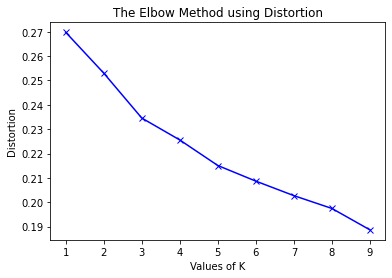

In [42]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(df_grouped_clustering)
    kmeanModel.fit(df_grouped_clustering)
 
    distortions.append(sum(np.min(cdist(df_grouped_clustering, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / df_grouped_clustering.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(df_grouped_clustering, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / df_grouped_clustering.shape[0]
    mapping2[k] = kmeanModel.inertia_


plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [36]:
#create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
df_merged = new_df

# add clustering labels
df_merged['Cluster Labels'] = kmeans.labels_

# merge df_merged to add latitude/longitude for each neighborhood
df_merged = df_merged.join(areas_venues_sorted.set_index('Area'), on='Area')

df_merged.head()

,Postcode,District,Area,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue
0,52100,Kepong,Jinjang,3.216670,101.650000,3,Vegetarian / Vegan Restaurant,Convenience Store,Chinese Restaurant,Dance Studio,Pharmacy,Fried Chicken Joint,Food Service,Cosmetics Shop
1,52100,Kepong,Taman Bukit Maluri,3.194706,101.628797,3,Chinese Restaurant,Café,Vegetarian / Vegan Restaurant,Asian Restaurant,Japanese Restaurant,Noodle House,Malay Restaurant,Pizza Place
2,51200,Segambut,Bandar Menjalara,3.194054,101.629478,3,Chinese Restaurant,Vegetarian / Vegan Restaurant,Asian Restaurant,Café,Japanese Restaurant,Tea Room,Noodle House,Malay Restaurant
3,51200,Segambut,Bukit Kiara,3.146800,101.662300,0,Café,Convenience Store,Burger Joint,Steakhouse,Salad Place,Italian Restaurant,Food Truck,Grocery Store
4,51200,Segambut,Bukit Tunku,3.165364,101.683011,1,Garden,Gym,Indie Theater,Hotel,Track,Yoga Studio,Fried Chicken Joint,Food Truck


## Visualizing Clusters

In [38]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

#Finally, let's visualize the resulting clusters
# create map 3.1343385, 101.6863371
kl_clusters = folium.Map(location=[3.1343385, 101.6863371], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_merged['Latitude'], df_merged['Longitude'], df_merged['Area'], df_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(kl_clusters)
       
kl_clusters

##Results

##### Cluster 0 (Top 3 Most Common Venues: Chinese Restaurant, Hotel, Cafe)

In [21]:
df_merged.loc[df_merged['Cluster Labels'] == 0, df_merged.columns[[2] + list(range(5, df_merged.shape[1]))]]

,Area,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue
3,Bukit Kiara,0,Café,Convenience Store,Burger Joint,Steakhouse,Salad Place,Italian Restaurant,Food Truck,Grocery Store
12,Taman Tun Dr Ismail,0,Burger Joint,Coffee Shop,Restaurant,Malay Restaurant,Chinese Restaurant,Thai Restaurant,Bakery,Café
27,Bukit Nanas,0,Hotel,Café,Nightclub,Bar,Restaurant,Hotel Bar,Convenience Store,Breakfast Spot
29,Chow Kit,0,Chinese Restaurant,Pakistani Restaurant,Convenience Store,Vegetarian / Vegan Restaurant,Asian Restaurant,Malay Restaurant,Toy / Game Store,Clothing Store
31,Desa Petaling,0,Chinese Restaurant,Convenience Store,Asian Restaurant,Soccer Field,Surf Spot,Food Truck,Palace,Malay Restaurant
32,KL City Centre,0,Hotel,Coffee Shop,Clothing Store,Juice Bar,Lounge,Electronics Store,Dessert Shop,Fountain
40,Kg Abdullah Hukum,0,Ice Cream Shop,Bakery,Food Court,Department Store,Clothing Store,Japanese Restaurant,Movie Theater,Cosmetics Shop
44,Bukit Jalil,0,Café,Racetrack,Athletics & Sports,Soccer Stadium,Stadium,Halal Restaurant,Hockey Arena,Light Rail Station
58,Taman Len Seng,0,Chinese Restaurant,Café,Pool Hall,Seafood Restaurant,Malay Restaurant,Dim Sum Restaurant,Shop & Service,Tailor Shop


##### Cluster 1 (Top 3 Most Common Venues: Malay Restaurant, Chinese Restaurant, Ice Cream Shop)

In [22]:
df_merged.loc[df_merged['Cluster Labels'] == 1, df_merged.columns[[2] + list(range(5, df_merged.shape[1]))]]

,Area,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue
4,Bukit Tunku,1,Garden,Gym,Indie Theater,Hotel,Track,Yoga Studio,Fried Chicken Joint,Food Truck
14,Sentul,1,Malay Restaurant,Chinese Restaurant,Building,Asian Restaurant,Café,Night Market,Gym,Comfort Food Restaurant
18,Kampung Datuk Keramat,1,Malay Restaurant,Middle Eastern Restaurant,Convenience Store,Pizza Place,Pet Store,Italian Restaurant,Park,Asian Restaurant
21,Ampang,1,Chinese Restaurant,Asian Restaurant,Indian Restaurant,Malay Restaurant,Pizza Place,Food Truck,Thai Restaurant,Convenience Store
24,Kampung Baru,1,Malay Restaurant,Indonesian Restaurant,Thai Restaurant,Asian Restaurant,Hotel,Restaurant,Diner,Steakhouse
41,Mid Valley City,1,Ice Cream Shop,Bakery,Department Store,Clothing Store,Japanese Restaurant,Movie Theater,Cosmetics Shop,Shopping Mall
42,Pantai Dalam,1,Malay Restaurant,Flea Market,Coffee Shop,Restaurant,River,Food,Breakfast Spot,Soup Place
51,Alam Damai,1,Convenience Store,Malay Restaurant,Food Court,Pizza Place,Harbor / Marina,Padangnese Restaurant,Supplement Shop,Pet Store
55,Taman Cheras Hartamas,1,Sandwich Place,Malay Restaurant,Café,Multiplex,Clothing Store,Coffee Shop,Gym / Fitness Center,Boutique
57,Taman Midah,1,Indian Restaurant,Chinese Restaurant,Malay Restaurant,Dog Run,Pet Store,Seafood Restaurant,Gym / Fitness Center,Food


##### Cluster 2 (Top 3 Most Common Venues: Malay Restaurant, Cafe, Fast Food Restaurant	)

In [23]:
df_merged.loc[df_merged['Cluster Labels'] == 2, df_merged.columns[[2] + list(range(5, df_merged.shape[1]))]]

,Area,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue
19,Semarak,2,Malay Restaurant,Café,Fast Food Restaurant,Pharmacy,Supermarket,Soccer Field,Indonesian Restaurant,Gym / Fitness Center


##### Cluster 3 (Top 3 Most Common Venues: Chinese Restaurant, Cafe, Malay Restaurant	)

In [24]:
df_merged.loc[df_merged['Cluster Labels'] == 3, df_merged.columns[[2] + list(range(5, df_merged.shape[1]))]]

,Area,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue
0,Jinjang,3,Vegetarian / Vegan Restaurant,Convenience Store,Chinese Restaurant,Dance Studio,Pharmacy,Fried Chicken Joint,Food Service,Cosmetics Shop
1,Taman Bukit Maluri,3,Chinese Restaurant,Café,Vegetarian / Vegan Restaurant,Asian Restaurant,Japanese Restaurant,Noodle House,Malay Restaurant,Pizza Place
2,Bandar Menjalara,3,Chinese Restaurant,Vegetarian / Vegan Restaurant,Asian Restaurant,Café,Japanese Restaurant,Tea Room,Noodle House,Malay Restaurant
5,Damansara,3,Café,Japanese Restaurant,Korean Restaurant,Chinese Restaurant,Dessert Shop,Bakery,Ice Cream Shop,Vietnamese Restaurant
6,Damansara Town Centre,3,Dog Run,Plaza,Gym,Rest Area,Wine Bar,Convenience Store,Pool,Rock Club
7,Jalan Duta,3,Café,Pizza Place,Spa,Grocery Store,Shopping Mall,Gym / Fitness Center,Modern European Restaurant,Mexican Restaurant
8,Kampung Kasipillay,3,Malay Restaurant,Indonesian Restaurant,Bookstore,Burger Joint,Gift Shop,Golf Course,German Restaurant,Gas Station
9,Kampung Sungai Penchala,3,Malay Restaurant,Food Truck,Restaurant,Asian Restaurant,Café,Coffee Shop,Athletics & Sports,Breakfast Spot
10,Mont Kiara,3,Japanese Restaurant,Korean Restaurant,Restaurant,Asian Restaurant,Spa,Café,Chinese Restaurant,Bar
11,Sri Hartamas,3,Japanese Restaurant,Korean Restaurant,Café,Yoga Studio,Hotel,Italian Restaurant,Malay Restaurant,Convenience Store


##### Cluster 4 (Top 3 Most Common Venues: Food Truck, Gym, Flower Shop	)

In [25]:
df_merged.loc[df_merged['Cluster Labels'] == 4, df_merged.columns[[2] + list(range(5, df_merged.shape[1]))]]

,Area,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue
20,Desa Tun Hussein Onn,4,Food Truck,Gym,Flower Shop,Bed & Breakfast,Gift Shop,German Restaurant,Gas Station,Garden


## Observations

1. Hotels are mostly located in Cluster 0, 1 and 3. However, cluster 3 has 4 areas with hotels as the top 3 most common venue (KL Sentral, Dang Wangi, Medan Tuanku, Bangsar South), making Cluster 3 the most popular place the set up a hotel. Cluster 0, however, has the 2nd highest popularity with 2 areas having hotels as the most common venue (Bukit Nanas and KL City Center).

2. For the 2 areas in Cluster 0 which has hotel as their most popular venue (Bukit Nanas and KL City Center), both areas have food related shops nearby (Examples: Restaurant, Bar, Lounge)

3. The food industry is shown to be really popular in Kuala Lumpur, as a majority of the areas have either a restaurant or a food related shop as their most common venue. Most of the restaurants, however, are popular in Cluster 3, with a majority of areas having restaurants as their most popular venue.

4. Cluster 0 is also famous for their sports facilities, with places such as soccer stadiums and racetrack being listed as some of the most common venues.


## Conclusion

After the analysis above, despite the high popularity in Cluster 3, it is deduced that areas in Cluster 1 is the most suitable to open a new hotel. This is due to it's above average popularity in tourism with two areas listing hotels as their most common venues (Bukit Nanas and KL City Center). Despite having the most amount of hotels, Cluster 3 may not be the best option as there could be too many competitions around the area. Cluster 0 was also surrounded with a variety of multinational restaurants, giving tourists a variety of choices when it comes to food.

Despite the conclusion being made, a few suggestions are provided to further increase the accuracy of the analysis. Firstly, the amount of areas need to be reduced into a smaller amount. As an example, only the 2 districts with the most amount of areas (Segambut and Bukit Bintang) are analyzed to simplify the analysis process. Other factors, such as tourist hotspots, competitions and price must also be taken account to further analyze the suitability of the place.

The conclusion given from this research, however, suggests that the best areas to open a hotel is in Bukit Nanas and KL City Center.